In [1]:
import tensorflow as tf
import numpy as np

### Fancy Softmax classification 구현하기

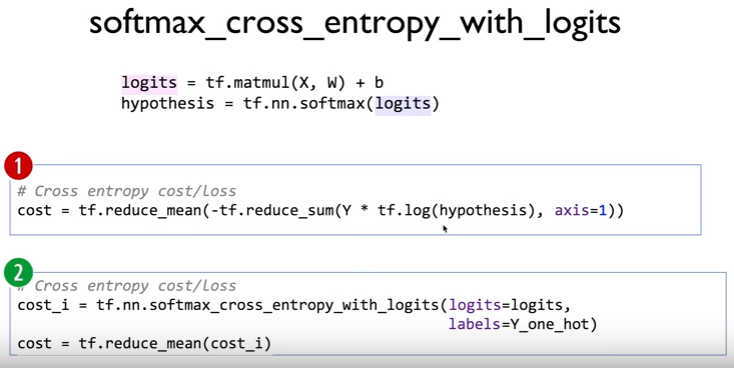

1번과 같은 복잡한 식에서 2번과 같은 간단하게 cross entropy cost function을 사용할 수 있게 한다.

logits는 tf.matmul(X, W)+b이고 labels는 one-hot으로 표현된 Y를 의미한다.

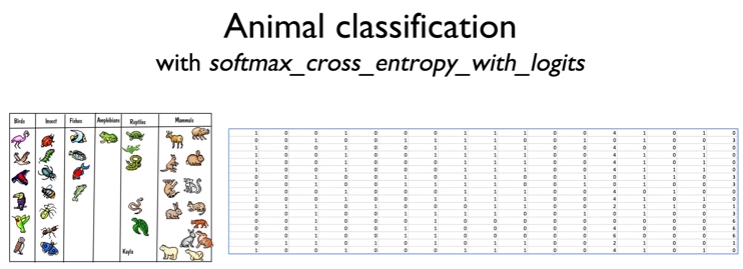

실습할 파일은 동물들의 특징을 값으로 나타낸 분류를 나타냄. 0-6까지의 label 존재.

In [2]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

tf.one_hot()을 하게 된 경우의 예시

[[0], [3]] (2차원) => [[[1, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 1, 0, 0, 0]]] (3차원)

주석의 ?는 n개의 data를 의미함.

tf.reshape를 통해 원하는 shape로 바꿔준다.

reshape 후의 모양 ==> [[1, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 0, 0, 0]]

In [3]:
# one_hot and reshape
nb_classes = 7

X = tf.placeholder(tf.float32, [None, 16]) # feature의 갯수 16개

Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6, shape=(?, 1)
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot shape=(?, 1, 7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])  # shape=(?, 7)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [4]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [5]:
# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction =tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

flatten()의 경우는 [[1],[0]] ==> [1, 0] 으로 변환해주는 역할을 함.

In [6]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2500):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data})
            
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
    
    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Step:     0	Loss: 5.490	Acc: 13.86%
Step:   100	Loss: 0.767	Acc: 79.21%
Step:   200	Loss: 0.452	Acc: 87.13%
Step:   300	Loss: 0.332	Acc: 92.08%
Step:   400	Loss: 0.265	Acc: 93.07%
Step:   500	Loss: 0.222	Acc: 95.05%
Step:   600	Loss: 0.192	Acc: 95.05%
Step:   700	Loss: 0.169	Acc: 96.04%
Step:   800	Loss: 0.151	Acc: 96.04%
Step:   900	Loss: 0.137	Acc: 96.04%
Step:  1000	Loss: 0.125	Acc: 98.02%
Step:  1100	Loss: 0.114	Acc: 98.02%
Step:  1200	Loss: 0.105	Acc: 98.02%
Step:  1300	Loss: 0.098	Acc: 98.02%
Step:  1400	Loss: 0.091	Acc: 98.02%
Step:  1500	Loss: 0.085	Acc: 98.02%
Step:  1600	Loss: 0.080	Acc: 98.02%
Step:  1700	Loss: 0.075	Acc: 100.00%
Step:  1800	Loss: 0.071	Acc: 100.00%
Step:  1900	Loss: 0.067	Acc: 100.00%
Step:  2000	Loss: 0.064	Acc: 100.00%
Step:  2100	Loss: 0.060	Acc: 100.00%
Step:  2200	Loss: 0.058	Acc: 100.00%
Step:  2300	Loss: 0.055	Acc: 100.00%
Step:  2400	Loss: 0.053	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3